<div style = "text-align:right"> Antoine Moulin & Alberto Begué</div>

# SD-TSIA 210
# Computer Lab: Bagging and Random Forests

<b>Lab's authors:</b> A. Garcia, A. Lambert, G. Staerman, G. Varni <br/>
<b>Date:</b> April 12, 2019

<h2>Model aggregation</h2>

<b>Math question:</b> Let us consider $L$ binary independent classifiers where the probability of a correct
prediction is $p > 0.5$. Then, the prediction of the aggregation of models follows a Binomial distribution
with parameters $p$ and $L$ (Why ?).

As the different classifiers are independant and identically distributed (they follow a Bernoulli distribution with parameter $p$), we know that the sum of these Bernoulli variables follows a Binomial distribution, with parameters $p$ and $L$.

<h3> Question 1 </h3> 

If p = 0.7 (which means a probability slightly greater than by chance) and L = 10, what is the
probability of correct prediction for the aggregation of models ? We could use the implementation
of the Binomial distribution in scipy :

    from scipy.stats import binom
    rv = binom(L, p)

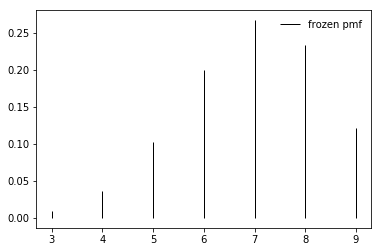

The probability of correct prediction for the aggregation of models is: 0.9158941035999999


In [1]:
from scipy.stats import binom
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def pSuccess(L, p):
    rv = binom(L, p)
    if (L%2 == 0):
        failure_proba = rv.cdf(L/2 - 1) + rv.pmf(L/2 - 1)
    else:
        failure_proba = rv.cdf((L-1)/2)
        
    return 1 - failure_proba

L = 10
p = 0.7

fig, ax = plt.subplots(1, 1)

x = np.arange(binom.ppf(0.01, L, p), binom.ppf(0.99, L, p))
rv = binom(L, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf') #pmf stands for probability mass function
ax.legend(loc='best', frameon=False)
plt.show()

print('The probability of correct prediction for the aggregation of models is: ' + str(pSuccess(L, p)))

<h2>Bagging</h2>

<h3>Question 1</h3>

Use Bagging with first decision trees of depth 1 (called stumps) and then with decision trees
characterized by a greater depth. Use the following code:

#### Stumps

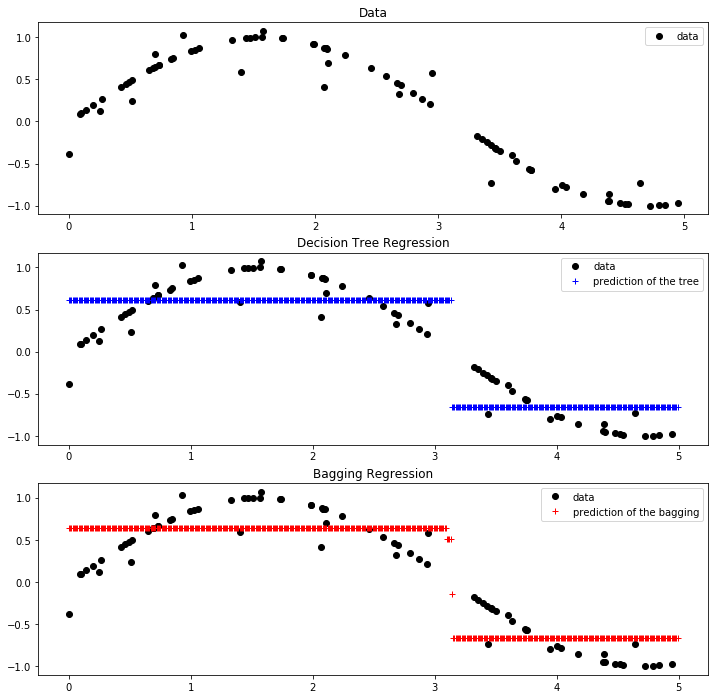

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))
n_estimators = 10 # L in the text
tree_max_depth = 10

# Define the regressor by bagging stumps
stump = DecisionTreeRegressor(max_depth=1, random_state=rng) 
stump.fit(X, y)
bagging = BaggingRegressor(base_estimator=stump, n_estimators=n_estimators, random_state=rng)
bagging.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_test = np.sin(X_test).ravel()
y_tree = stump.predict(X_test)
y_bagging = bagging.predict(X_test)

# Plot the results
fig = plt.figure(figsize=(12, 12))

# Add plots for Bagging/Tree
fig.add_subplot(3, 1, 1)
plt.plot(X, y, 'o', c="k", label="data")
plt.title("Data")
plt.legend(loc=1, numpoints=1)

fig.add_subplot(3, 1, 2)
plt.plot(X, y, 'o', c="k", label="data")
plt.plot(X_test, y_tree, '+', c="b", label="prediction of the tree")
plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)

fig.add_subplot(3, 1, 3)
plt.plot(X, y, 'o', c="k", label="data")
plt.plot(X_test, y_bagging, '+', c="r", label="prediction of the bagging")
plt.title("Bagging Regression")
plt.legend(loc=1, numpoints=1)

plt.show()

#### Trees of depth 10

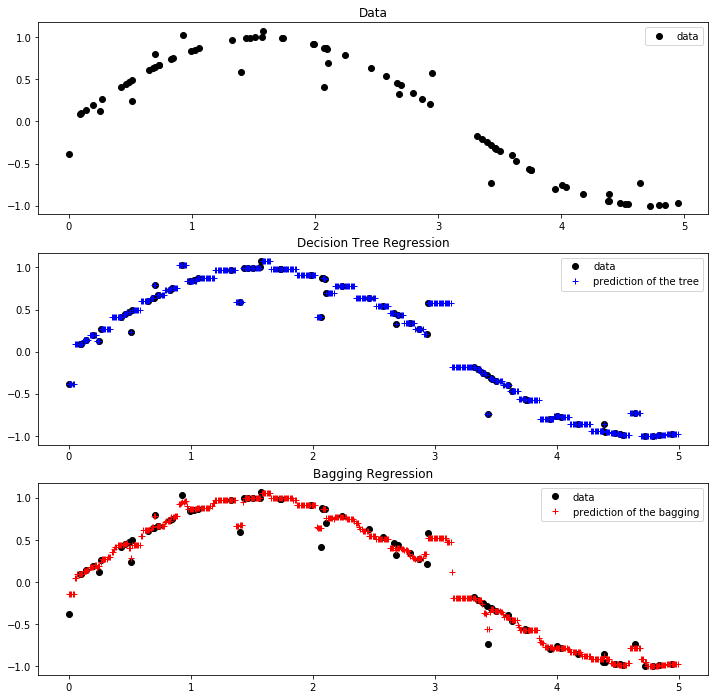

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))
n_estimators = 10 # L in the text
tree_max_depth = 10

# Define the regressor by bagging stumps
tree = DecisionTreeRegressor(max_depth=tree_max_depth, random_state=rng) 
tree.fit(X, y)
bagging = BaggingRegressor(base_estimator=tree, n_estimators=n_estimators, random_state=rng)
bagging.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_test = np.sin(X_test).ravel()
y_tree = tree.predict(X_test)
y_bagging = bagging.predict(X_test)

# Plot the results
fig = plt.figure(figsize=(12, 12))

# Add plots for Bagging/Tree
fig.add_subplot(3, 1, 1)
plt.plot(X, y, 'o', c="k", label="data")
plt.title("Data")
plt.legend(loc=1, numpoints=1)

fig.add_subplot(3, 1, 2)
plt.plot(X, y, 'o', c="k", label="data")
plt.plot(X_test, y_tree, '+', c="b", label="prediction of the tree")
plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)

fig.add_subplot(3, 1, 3)
plt.plot(X, y, 'o', c="k", label="data")
plt.plot(X_test, y_bagging, '+', c="r", label="prediction of the bagging")
plt.title("Bagging Regression")
plt.legend(loc=1, numpoints=1)

plt.show()

<h3>Question 2</h3>

Graphically illustrate the roles of $L$ and of the tree depth (<tt>max_depth</tt>).

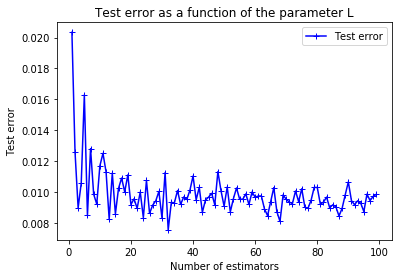

In [4]:
from sklearn.metrics import mean_squared_error

mse_l = []

for l in range(1, 100):
    tmp_tree = DecisionTreeRegressor(max_depth=tree_max_depth, random_state=rng)
    tmp_bagging = BaggingRegressor(base_estimator=tmp_tree, n_estimators=l, random_state=rng)
    tmp_bagging.fit(X, y)
    
    mse_l.append(mean_squared_error(tmp_bagging.predict(X_test), y_test))

plt.figure()
plt.plot(np.arange(1, 100), mse_l, marker='+', c='b', label='Test error')
plt.title('Test error as a function of the parameter L')
plt.xlabel('Number of estimators')
plt.ylabel('Test error')
plt.legend(loc='best')
plt.show()

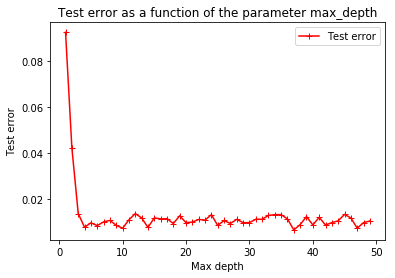

In [5]:
mse_d = []

for d in range(1, 50):
    tmp_tree = DecisionTreeRegressor(max_depth=d, random_state=rng) 
    tmp_bagging = BaggingRegressor(base_estimator=tmp_tree, n_estimators=L, random_state=rng)
    tmp_bagging.fit(X, y)
    
    mse_d.append(mean_squared_error(tmp_bagging.predict(X_test), y_test))

plt.figure()
plt.plot(np.arange(1, 50), mse_d, marker='+', c='r', label='Test error')
plt.title('Test error as a function of the parameter max_depth')
plt.xlabel('Max depth')
plt.ylabel('Test error')
plt.legend(loc='best')
plt.show()

<h3>Question 3</h3>

How can we check that the estimators computed with the decision trees are biased and that the
ones based on bagging reduce the variance?

The decision trees are, by construction, biased because it uses splits to predict a value. 
But bagging reduces the variance because, if $X_i$ are iid, we have:
$$Var\left(\frac{1}{n}\sum_{i=1}^n X_i\right) = \frac{1}{n}Var(X_1)$$. Consequently, the variance diminishes with the number of estimators that we use in the bagging.

<h3>Question 4</h3>

Playing with the noise level, show the over-fitting.

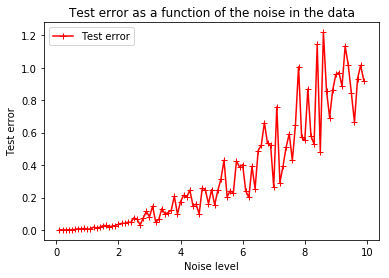

In [10]:
mse_d = []
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel() #no noise yet

for noise_level in np.arange(0.1, 10, 0.1):
    tmp_tree = DecisionTreeRegressor(max_depth=d, random_state=rng) 
    # Add the noise
    y_tmp = y.copy()
    y_tmp[::5] += noise_level * (0.5 - rng.rand(16))
    tmp_bagging = BaggingRegressor(base_estimator=tmp_tree, n_estimators=L, random_state=rng)
    tmp_bagging.fit(X, y_tmp)
    
    mse_d.append(mean_squared_error(tmp_bagging.predict(X_test), y_test))

plt.figure()
plt.plot(np.arange(0.1, 10, 0.1), mse_d, marker='+', c='r', label='Test error')
plt.title('Test error as a function of the noise in the data')
plt.xlabel('Noise level')
plt.ylabel('Test error')
plt.legend(loc='best')
plt.show()

This shows that the more there is noise in the training data, the more the error on the test set is important. It results from an overfitting. Hence, bagging does not prevent from overfitting.

<h3>Question 5</h3>

Show that we can reduce this phenomenon by randomly sub-sampling without
replacement instead than taking the bootstrap samples.

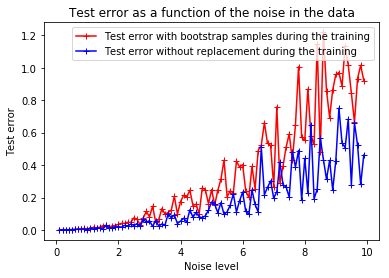

In [12]:
mse_d_wo_replacement = []
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel() #no noise yet

for noise_level in np.arange(0.1, 10, 0.1):
    tmp_tree = DecisionTreeRegressor(max_depth=d, random_state=rng) 
    # Add the noise
    y_tmp = y.copy()
    y_tmp[::5] += noise_level * (0.5 - rng.rand(16))
    tmp_bagging = BaggingRegressor(base_estimator=tmp_tree, n_estimators=L, random_state=rng, bootstrap = False, max_samples = 0.4) 
    tmp_bagging.fit(X, y_tmp)
    
    mse_d_wo_replacement.append(mean_squared_error(tmp_bagging.predict(X_test), y_test))

plt.figure()
plt.plot(np.arange(0.1, 10, 0.1), mse_d, marker='+', c='r', label='Test error with bootstrap samples during the training')
plt.plot(np.arange(0.1, 10, 0.1), mse_d_wo_replacement, marker='+', c='b', label='Test error without replacement during the training')
plt.title('Test error as a function of the noise in the data')
plt.xlabel('Noise level')
plt.ylabel('Test error')
plt.legend(loc='best')
plt.show()

We can see that drawing the samples without replacement helps to reduce the overfitting because the test error is less important when there is a high noise level.

<h2>Random Forests</h2>

The Random Forests combine the ideas of Bagging, bootstrap sampling and average, with a random selection of the variables at every node of the tree. For a classiﬁcation task, the aggregation is made with a majority rule.

<h3>Question 6</h3>

Evaluate the scores using Random Forests with a 7-fold cross-validation on the data-sets boston, diabetes, iris and digits. Compare the performances with the ones of a linear SVM. You could use : 

In [19]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.datasets import load_boston, load_diabetes, load_iris, load_digits
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC, SVR

boston = load_boston()
diabetes = load_diabetes()
iris = load_iris()
digits = load_digits()

REGRESSION on boston and diabetes. The computed score is the R^2 coefficient, which can be negative. The best possible score is 1


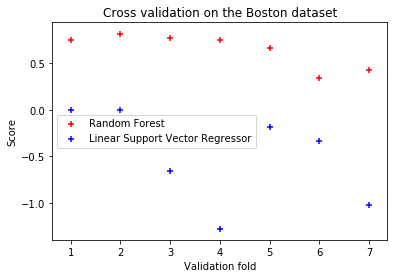

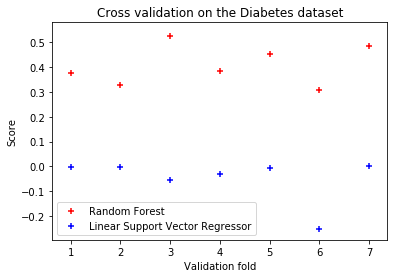

CLASSIFICATION on Iris and Digits. The computed score is the mean accuracy on data and labels.


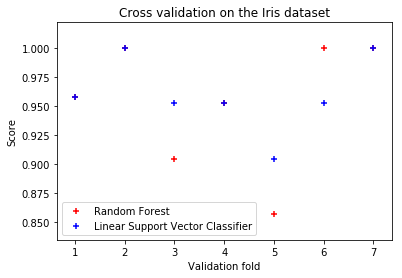

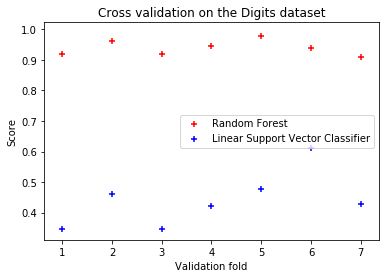

In [20]:
RF_reg = RandomForestRegressor(n_estimators=100)
SVR_reg = SVR(gamma = 'auto')

print("REGRESSION on boston and diabetes. The computed score is the R^2 coefficient, which can be negative. The best possible score is 1")

# Dataset : boston
fig, ax = plt.subplots()
ax.scatter(np.arange(1,8,1), cross_val_score(RF_reg, boston.data, boston.target, cv = 7), marker='+', c='r',label='Random Forest')
ax.scatter(np.arange(1,8,1), cross_val_score(SVR_reg, boston.data, boston.target, cv = 7), marker='+', c='b',label ='Linear Support Vector Regressor')
plt.xlabel('Validation fold')
plt.ylabel('Score')
plt.legend(loc='best')
plt.title('Cross validation on the Boston dataset')
plt.show()


# Dataset : diabetes
fig, ax = plt.subplots()
ax.scatter(np.arange(1,8,1), cross_val_score(RF_reg, diabetes.data, diabetes.target, cv = 7), marker='+', c='r',label='Random Forest')
ax.scatter(np.arange(1,8,1), cross_val_score(SVR_reg, diabetes.data, diabetes.target, cv = 7), marker='+', c='b',label ='Linear Support Vector Regressor')
plt.xlabel('Validation fold')
plt.ylabel('Score')
plt.legend(loc='best')
plt.title('Cross validation on the Diabetes dataset')
plt.show()


# Dataset : iris /!\ Classification
print("CLASSIFICATION on Iris and Digits. The computed score is the mean accuracy on data and labels.")

RF_clf = RandomForestClassifier(n_estimators=100)
SVM_clf = SVC(gamma = 'auto')

fig, ax = plt.subplots()
ax.scatter(np.arange(1,8,1), cross_val_score(RF_clf, iris.data, iris.target, cv = 7), marker='+', c='r',label='Random Forest')
ax.scatter(np.arange(1,8,1), cross_val_score(SVM_clf, iris.data, iris.target, cv = 7), marker='+', c='b',label ='Linear Support Vector Classifier')
plt.xlabel('Validation fold')
plt.ylabel('Score')
plt.legend(loc='best')
plt.title('Cross validation on the Iris dataset')
plt.show()

# Dataset : digits /!\ Classification

fig, ax = plt.subplots()
ax.scatter(np.arange(1,8,1), cross_val_score(RF_clf, digits.data, digits.target, cv = 7), marker='+', c='r',label='Random Forest')
ax.scatter(np.arange(1,8,1), cross_val_score(SVM_clf, digits.data, digits.target, cv = 7), marker='+', c='b',label ='Linear Support Vector Classifier')
plt.xlabel('Validation fold')
plt.ylabel('Score')
plt.legend(loc='best')
plt.title('Cross validation on the Digits dataset')
plt.show()

<h3>Question 7</h3>

The Random Forests, like Bagging, can be used to predict a probability. In order to do that, the probability of belonging to class k is the proportion of trees which predict class k. 

Using the data-set iris, limited to the ﬁrst two variables/features, show the prediction probabilities for each class. Start from the following script where you will vary the number of random trees (parameter n_estimators). 

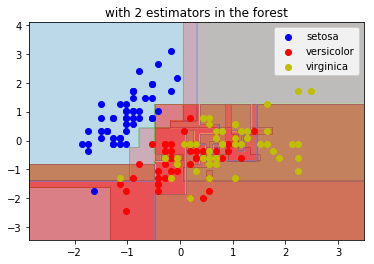

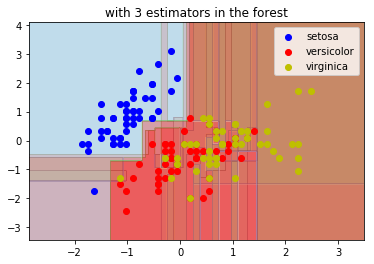

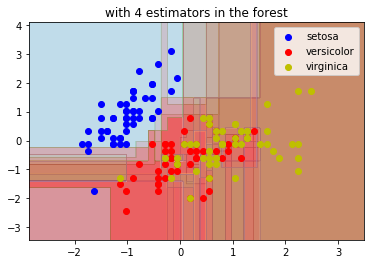

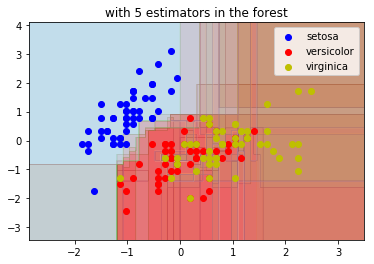

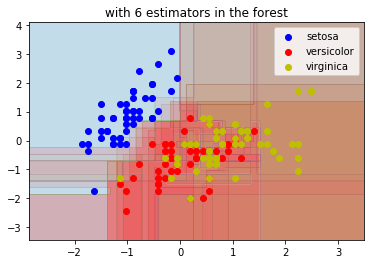

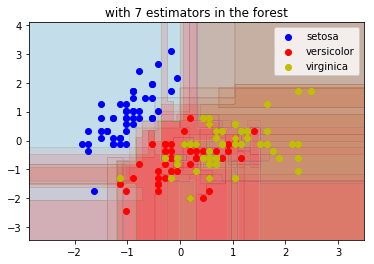

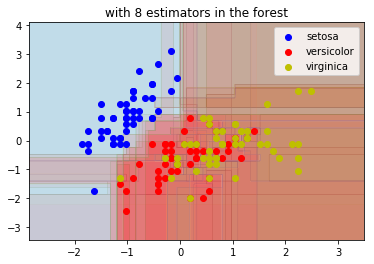

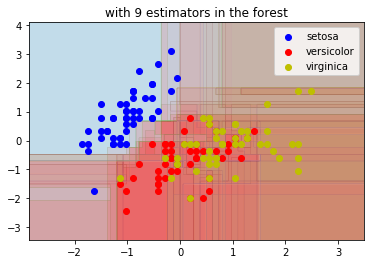

In [21]:
from sklearn import preprocessing

# Parameters
n_estimators = 2
plot_colors = "bry"
plot_step = 0.02

# Load data 
iris = load_iris()
X_unscaled, y = iris.data[:, :2], iris.target

# Standardize
X = preprocessing.scale(X_unscaled)

for n_estimators in range(2,10):
    # RF fitting 
    model = RandomForestClassifier(n_estimators=n_estimators)
    clf = model.fit(X, y)

    # Plot the decision boundary 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), 
                         np.arange(y_min, y_max, plot_step))


    fig, ax = plt.subplots() 
    Z = []
    for tree in model.estimators_:
        Z = tree.predict(np.column_stack((xx.ravel(), yy.ravel())))
        Z = Z.reshape(xx.shape)
        cs = ax.contourf(xx, yy, Z, alpha=1. / n_estimators, cmap=plt.cm.Paired)
    ax.axis("tight")

    # Plot the training points 
    for i, c in zip(range(3), plot_colors): 
        idx = np.where(y == i) 
        ax.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i], cmap=plt.cm.Paired)
    plt.legend(scatterpoints=1) 
    plt.title('with ' + str(n_estimators) + ' estimators in the forest')
    plt.show()


<h3>Question 8</h3>

Compare the scores between Random Forests with a 6-fold cross-validation and the pure decision trees (obtained with DecisionTreeClassifier), on the data-set iris limited to the ﬁrst two features/variables. Vary the parameter max_depth between 1 and 30. Show that both Random Forests and decision trees reduce the over-ﬁtting.

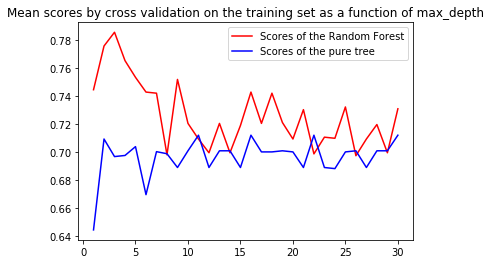

In [22]:
from sklearn.tree import DecisionTreeClassifier

X_unscaled, y = iris.data[:, :2], iris.target

# Standardize
X = preprocessing.scale(X_unscaled)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

mean_scores_RF = []
mean_scores_tree = []
for d in range(1,31):
    RF_clf = RandomForestClassifier(max_depth=d, n_estimators=100)
    tree_clf = DecisionTreeClassifier(max_depth=d)

    mean_scores_RF.append(cross_val_score(RF_clf, X_train, y_train, cv = 6).mean())
    mean_scores_tree.append(cross_val_score(tree_clf, X_train, y_train, cv = 6).mean())

plt.figure()
plt.plot(np.arange(1,31,1),mean_scores_RF,'r', label='Scores of the Random Forest')
plt.plot(np.arange(1,31,1),mean_scores_tree,'b', label='Scores of the pure tree')
plt.legend(loc='best')
plt.title('Mean scores by cross validation on the training set as a function of max_depth')
plt.show()

<h2>Comparison of Random Forests with Extra random trees</h2>

The Extra-Trees algorithm builds an ensemble of unpruned decision (or regression) trees according to the classical top-down procedure. Its two main diﬀerences with random forest are that it splits nodes by choosing cut-points fully at random and that it uses the whole learning sample (rather than a bootstrap replica) to grow the trees. To be more accurate, the split of a node is chosen following these two steps : 
 - Select randomly and uniformly K split variables and split values.
 - Choose the best split variable/value among those taking the ones which maximizes (or minimize) a given criterion. 

<h3>Question 9</h3>

Using boston (regression) and iris (classiﬁcation, limited to the ﬁrst two variables/features) datasets, compare the performance of Extra random trees with Random Forest using 5-fold crossvalidation. 

REGRESSION on boston and diabetes. The computed score is the R^2 coefficient, which can be negative. The best possible score is 1


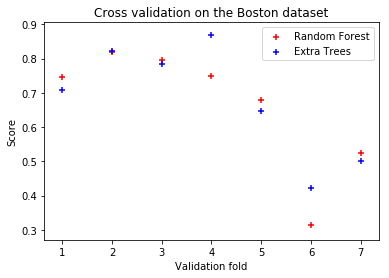

CLASSIFICATION on Iris and Digits. The computed score is the mean accuracy on data and labels.


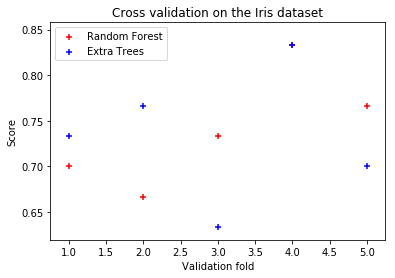

In [23]:
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor

print("REGRESSION on boston and diabetes. The computed score is the R^2 coefficient, which can be negative. The best possible score is 1")

RF_reg = RandomForestRegressor(n_estimators=100)
ET_reg = ExtraTreesRegressor(n_estimators=100)

# Dataset : boston
fig, ax = plt.subplots()
ax.scatter(np.arange(1,8,1), cross_val_score(RF_reg, boston.data, boston.target, cv = 7), marker='+', c='r',label='Random Forest')
ax.scatter(np.arange(1,8,1), cross_val_score(ET_reg, boston.data, boston.target, cv = 7), marker='+', c='b',label ='Extra Trees')
plt.xlabel('Validation fold')
plt.ylabel('Score')
plt.legend(loc='best')
plt.title('Cross validation on the Boston dataset')
plt.show()

# Dataset : iris /!\ Classification
print("CLASSIFICATION on Iris and Digits. The computed score is the mean accuracy on data and labels.")

RF_clf = RandomForestClassifier(n_estimators=100)
ET_clf = ExtraTreesClassifier(n_estimators=100)

X_unscaled, y = iris.data[:, :2], iris.target

# Standardize
X = preprocessing.scale(X_unscaled)

fig, ax = plt.subplots()
ax.scatter(np.arange(1,6,1), cross_val_score(RF_clf, X, y, cv = 5), marker='+', c='r',label='Random Forest')
ax.scatter(np.arange(1,6,1), cross_val_score(ET_clf, X, y, cv = 5), marker='+', c='b',label ='Extra Trees')
plt.xlabel('Validation fold')
plt.ylabel('Score')
plt.legend(loc='best')
plt.title('Cross validation on the Iris dataset')
plt.show()

We can see that Extra Trees and Random Forests have nearly the same performance, although Random Forests seem to be slightly better.

<h3>Question 10</h3>

Plot the feature importance (using an appropriate graphical tool) on both algorithms with iris dataset. Do we observe a diﬀerence? If so, explain why.

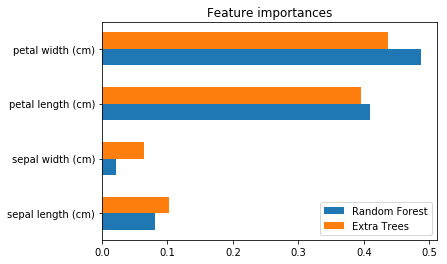

In [13]:
RF_clf.fit(iris.data, iris.target)
ET_clf.fit(iris.data, iris.target)

fig, ax = plt.subplots()
y_pos = np.arange(len(iris.feature_names))
width = 0.3
RF = ax.barh(y_pos,RF_clf.feature_importances_, width)
ET = ax.barh(y_pos + width, ET_clf.feature_importances_, width)
ax.set_yticks(y_pos + width / 2)
ax.set_yticklabels(iris.feature_names)
ax.legend((RF, ET), ('Random Forest', 'Extra Trees'))
plt.title('Feature importances')
plt.show()

There is a small difference in the feature importances depending on the algorithm, because of the random choice of the features in Extra Trees, but it is not very important.